<Axes: >

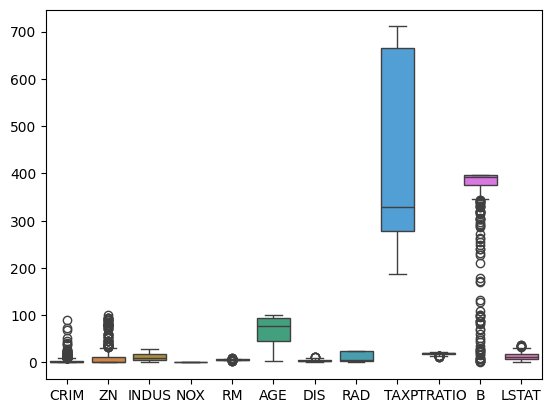

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv(r'C:\Users\nadys\Desktop\Projects\data\boston.csv')

sns.boxplot(data = data.drop(columns=['CHAS', 'MEDV']))

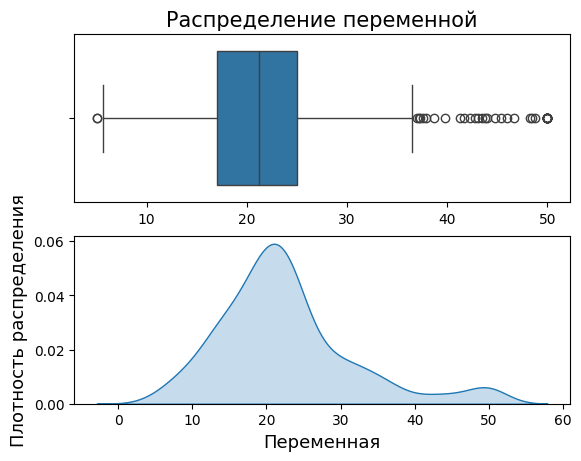

In [66]:
def box_density(x):
    f, (ax_box, ax_kde) = plt.subplots(nrows=2, # две строки
                                       ncols=1, # один столбец
                                       )
    
    sns.boxplot(x=x, ax=ax_box)
    ax_box.set(xlabel=None)

    sns.kdeplot(x, fill=True)

    ax_box.set_title('Распределение переменной', fontsize=15)
    ax_kde.set_xlabel('Переменная', fontsize=13)
    ax_kde.set_ylabel('Плотность распределения', fontsize=13)
    
    plt.show()

box_density(data.iloc[:, -1])

In [59]:
data.drop(columns = 'CHAS').corr().MEDV.to_frame().style.background_gradient().format('{:.3f}')

,MEDV
CRIM,-0.388
ZN,0.360
INDUS,-0.484
NOX,-0.427
RM,0.695
AGE,-0.377
DIS,0.250
RAD,-0.382
TAX,-0.469
PTRATIO,-0.508


In [11]:
statistic_biser, pvalue = stats.pointbiserialr(data.MEDV, data.CHAS)

print(statistic_biser, pvalue)

0.17526017719029846 7.390623170519879e-05


In [58]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(data)

data['anomaly'] = clf.predict(data)
data = data[data.anomaly == 1]
data = data.drop(columns='anomaly')
data.shape

(402, 14)

In [62]:
data.iloc[:, :-1] = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
data.CHAS.value_counts()

CHAS
-0.182581    389
 5.463391     13
Name: count, dtype: int64

In [3]:
from sklearn.linear_model import LinearRegression

X = data.drop('MEDV', axis=1)
y = data['MEDV']

model = LinearRegression()
y_pred = model.fit(X, y).predict(X)

R2 = 0.48352545599133423
b0 = [-34.67062078]
b1 = [[9.10210898]]
                                 OLS Regression Results                                
Dep. Variable:                     RM   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Tue, 31 Dec 2024   Prob (F-statistic):                   3.74e-256
Time:                        20:28:40   Log-Likelihood:                         -1065.2
No. Observations:                 506   AIC:                                      2132.
Df Residuals:                     505   BIC:                                      2137.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t| 

<Axes: xlabel='RM', ylabel='MEDV'>

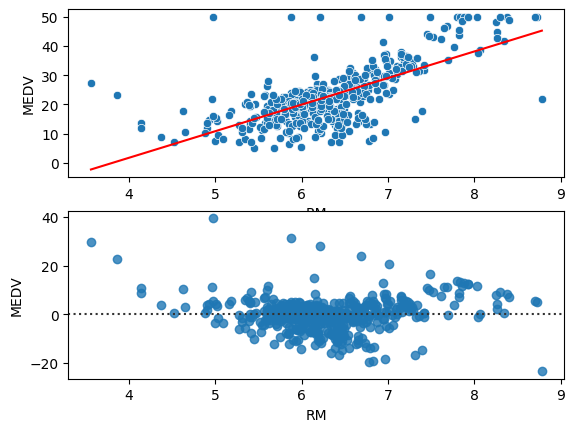

In [72]:
X = data[['RM']]
y = data[['MEDV']]

model = LinearRegression()
y_pred = model.fit(X, y).predict(X).reshape(-1)

R2 = model.score(X, y)
Intersept = model.intercept_
Slope = model.coef_
print(f'R2 = {R2}\nb0 = {Intersept}\nb1 = {Slope}')

mod = sm.OLS(data['RM'], data['MEDV'])
res = mod.fit()
print(res.summary())

fig = plt.figure()
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)

sns.scatterplot(data=data, x=X['RM'], y=y['MEDV'], ax=ax1)
sns.lineplot(x=X['RM'], y=y_pred, c='r', ax=ax1)
sns.residplot(x=X, y=y, ax=ax2)

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
factors = {'CRIM': 'Преступность',
           'TAX': 'Налог на недвижимость',
           'AGE': 'Возраст людей, которым принадлежит дом',
           'PTRATIO': 'Соотношение числа учащихся и преподавателей в районе'}

aims = {'MEDV': 'Средняя стоимость дома',
        'NOX': 'Уровень закиси азота'}